# Analysis of the Titanic Data Set using Descriptive Statistics, the 2-Proportion Z_test, and Binary Logistic Regression (Machine Learning)

In [66]:
%matplotlib inline
import numpy as np
import seaborn as sns

import imageio
import matplotlib.pyplot as plt

from skimage import data

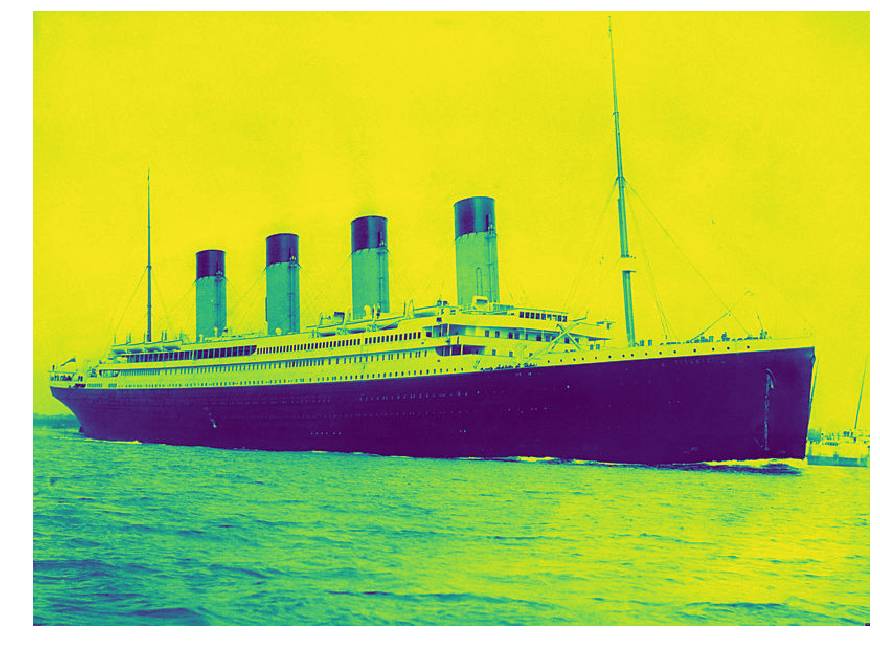

In [29]:
photo_titanic = imageio.imread('/Users/meganporter/OwnJupyterNotebooks/Titanic.jpg')
plt.figure(figsize=(15,15))
plt.axis('off')
plt.imshow(photo_titanic)
#Photo courtesy of Wikipedia

In [2]:
import pandas as pd

In [142]:
titanic = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/titanic3.csv', sep=',')
print(type(titanic))
titanic.head(10)

<class 'pandas.core.frame.DataFrame'>


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [127]:
titanic[-10:]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN,NaN


## Descriptive Statistics

In [5]:
# Let's look at the age column of Titanic passengers
titanic['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [6]:
titanic['age'].shape

(1309,)

In [7]:
# Ask Pandas if there are any null values
titanic['age'].isnull().any()

True

In [8]:
# Remove null values in the age column
titanic['age'].dropna()

0       29.00
1        0.92
2        2.00
3       30.00
4       25.00
5       48.00
6       63.00
7       39.00
8       53.00
9       71.00
10      47.00
11      18.00
12      24.00
13      26.00
14      80.00
16      24.00
17      50.00
18      32.00
19      36.00
20      37.00
21      47.00
22      26.00
23      42.00
24      29.00
25      25.00
26      25.00
27      19.00
28      35.00
29      28.00
30      45.00
        ...  
1269    33.00
1270    28.00
1271    28.00
1272    47.00
1273    18.00
1274    31.00
1275    16.00
1276    31.00
1277    22.00
1278    20.00
1279    14.00
1280    22.00
1281    22.00
1285    32.50
1286    38.00
1287    51.00
1288    18.00
1289    21.00
1290    47.00
1294    28.50
1295    21.00
1296    27.00
1298    36.00
1299    27.00
1300    15.00
1301    45.50
1304    14.50
1306    26.50
1307    27.00
1308    29.00
Name: age, Length: 1046, dtype: float64

In [9]:
titanic['age'].isnull().any()

True

## Analysis and Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c14c5b198>]],
      dtype=object)

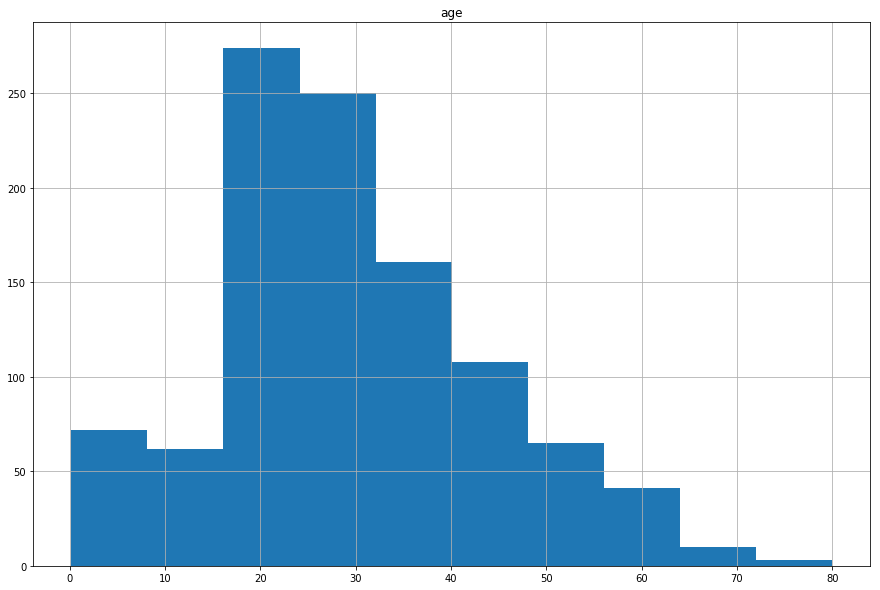

In [10]:
%matplotlib inline

titanic.hist(column='age', figsize=(15,10))

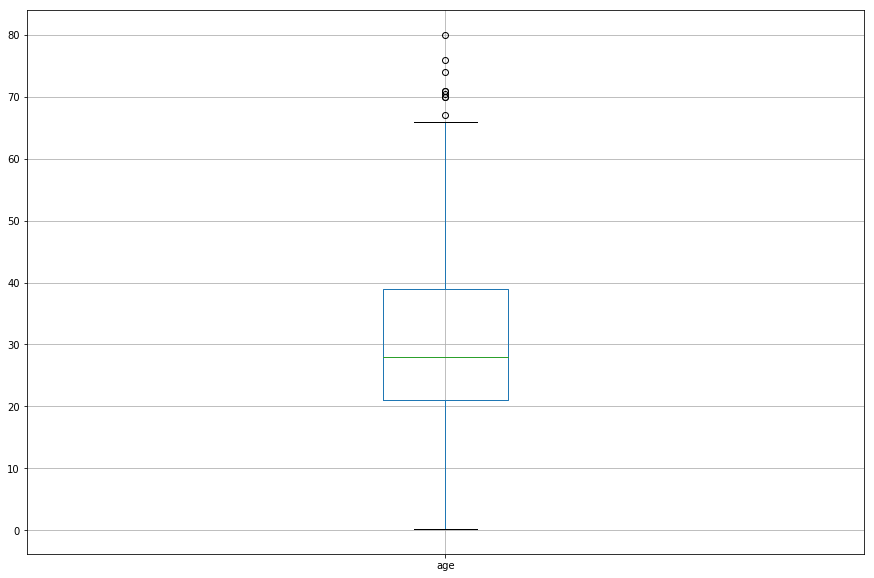

In [11]:
titanic.boxplot(column='age', figsize=(15,10))

In [12]:
titanic['age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

## Get summary statistics and create visuals for passenger age according to class

In [161]:
survivors = titanic['survived'] == 1

surv = titanic[survivors]
surv.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,1,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,1,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,1,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,1,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c14d1ac50>]],
      dtype=object)

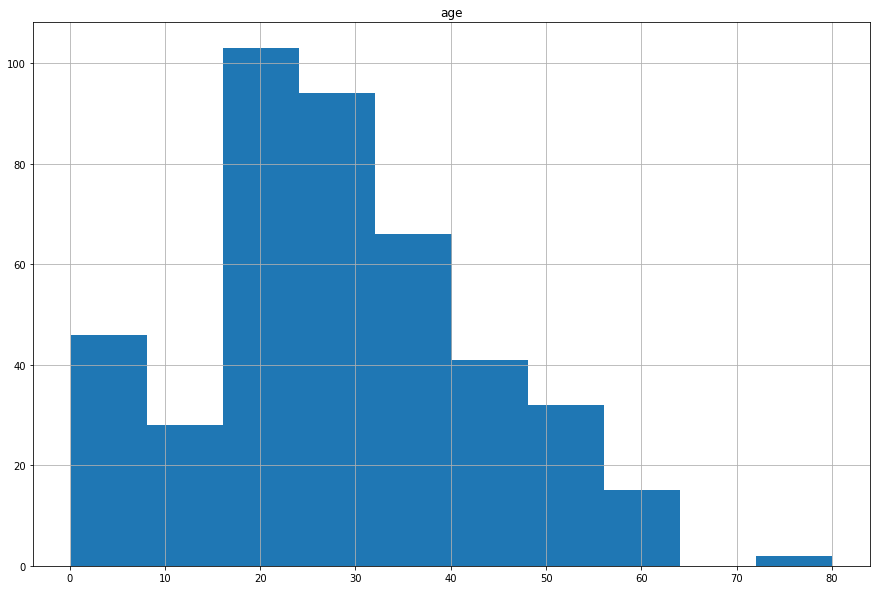

In [14]:
surv.hist(column='age', figsize=(15,10))

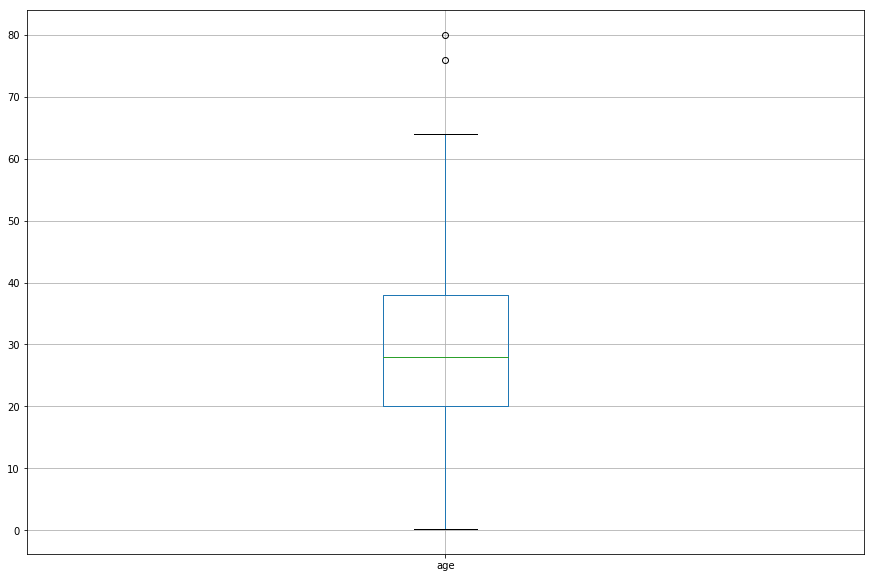

In [15]:
surv.boxplot(column='age', figsize=(15,10))

In [17]:
womens = titanic['sex'].str.contains('female')
women = titanic[womens & survivors]
women

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
11,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C,4,NaN,"New York, NY"
12,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C,9,NaN,"Paris, France"
13,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,6,NaN,NaN
17,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,6,NaN,"Montreal, PQ"
18,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C,8,NaN,NaN
21,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
23,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,4,NaN,NaN


In [18]:
women['age'].describe()

count    292.000000
mean      29.815377
std       14.769233
min        0.170000
25%       20.000000
50%       28.500000
75%       39.000000
max       76.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c15de12e8>]],
      dtype=object)

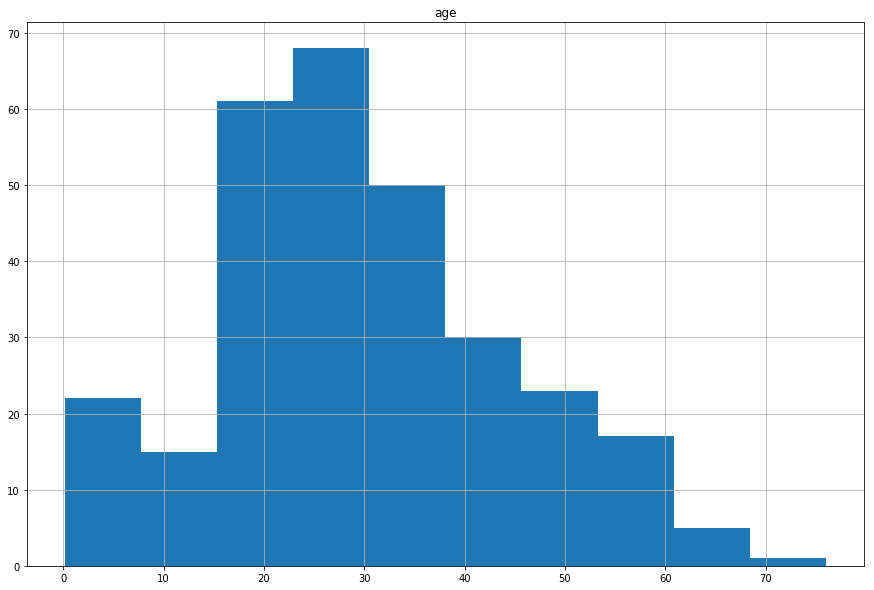

In [19]:
women.hist(column='age', figsize=(15,10))

In [20]:
titanic = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/titanic3.csv', sep=',')
print(type(titanic))
titanic.head(10)

<class 'pandas.core.frame.DataFrame'>


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [21]:
titanic['sex'] = titanic['sex'].str.replace('female','F')
titanic['sex'] = titanic['sex'].str.replace('male', 'M')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",F,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",M,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",F,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",M,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",F,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",M,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",F,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",M,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",F,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",M,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [22]:
men = titanic['sex'].str.contains('M')
mens = titanic[men & survivors]
mens

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",M,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",M,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
14,1,1,"Barkworth, Mr. Algernon Henry Wilson",M,80.00,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks"
20,1,1,"Beckwith, Mr. Richard Leonard",M,37.00,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY"
22,1,1,"Behr, Mr. Karl Howell",M,26.00,0,0,111369,30.0000,C148,C,5,NaN,"New York, NY"
26,1,1,"Bishop, Mr. Dickinson H",M,25.00,1,0,11967,91.0792,B49,C,7,NaN,"Dowagiac, MI"
29,1,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",M,28.00,0,0,110564,26.5500,C52,S,D,NaN,"Stockholm, Sweden / Washington, DC"
31,1,1,"Blank, Mr. Henry",M,40.00,0,0,112277,31.0000,A31,C,7,NaN,"Glen Ridge, NJ"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",M,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
47,1,1,"Calderhead, Mr. Edward Pennington",M,42.00,0,0,PC 17476,26.2875,E24,S,5,NaN,"New York, NY"


In [23]:
mens['age'].describe()

count    135.000000
mean      26.977778
std       15.553884
min        0.420000
25%       19.500000
50%       27.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x103043ba8>]],
      dtype=object)

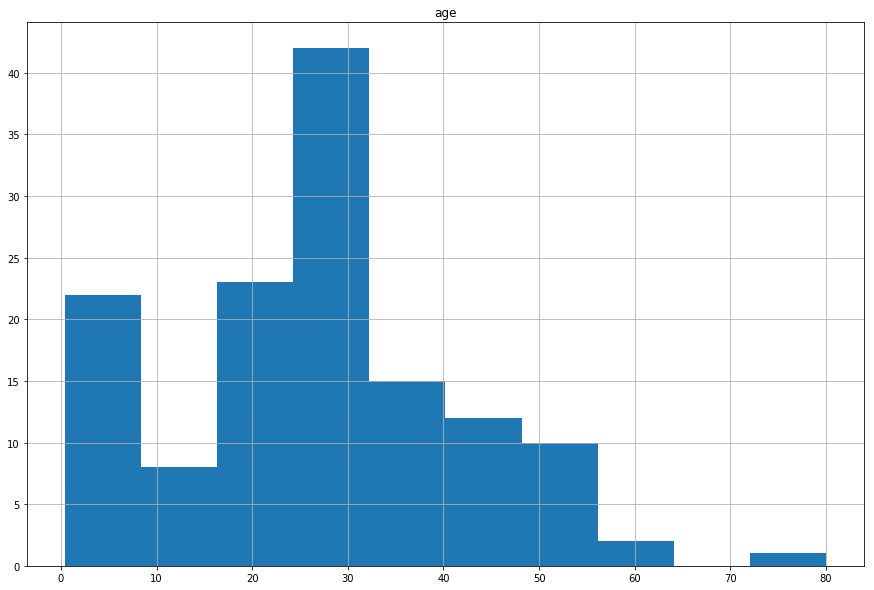

In [24]:
mens.hist(column='age', figsize=(15,10))

## 2 Proportion Z-Tests

#### Gender and Survival

##### H0: There is no difference in the proportion of men and women who survived the Titanic.
##### HA: There is a difference in the proportion of men and women who survived the Titanic.

In [33]:
count_gender = titanic['sex'].value_counts().to_frame()
count_gender

,sex
M,843
F,466


In [45]:
survived = titanic['survived']
survived.replace([0,1],['dead','survived'], inplace=True)
count_survived = titanic['survived'].value_counts().to_frame()
count_survived

,survived
dead,809
survived,500


In [52]:
gen_surv = titanic[['sex', 'survived']]
gen_surv.head()

,sex,survived
0,F,survived
1,M,survived
2,F,dead
3,M,dead
4,F,dead


In [95]:
# Crosstab, getting counts of survival by gender
gen_surv_ = pd.crosstab(titanic['sex'], titanic['survived'])
gen_surv_

survived,0,1
sex,,
0,1046,0
female,31,47
male,159,26


In [107]:
# 2 Z-test for a difference of two proportions
from statsmodels.stats.proportion import proportions_ztest
counts = np.array([339, 161])
num_obs = np.array([466, 843])
stat, p_val = proportions_ztest(counts, num_obs)
print('{0:0.3f}'.format(p_val))

0.000


##### Conclusion: With an assumed default alpha of .05 and a p-value of 0, we conclude that there is sufficient evidence to reject the null hypotheses.  There is evidence to suggest there is a difference between the proportion of men and women who died on the Titanic.

### Age and Survival

##### H0: The proportion of adults and children who survived the Titanic is the same.
##### HA: There is a difference in the proportion of adults and children who survived the Titanic.

In [143]:
titanic['age'].isnull().head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
Name: age, dtype: bool

In [144]:
titanic['age'].dropna().head(20)

0     29.00
1      0.92
2      2.00
3     30.00
4     25.00
5     48.00
6     63.00
7     39.00
8     53.00
9     71.00
10    47.00
11    18.00
12    24.00
13    26.00
14    80.00
16    24.00
17    50.00
18    32.00
19    36.00
20    37.00
Name: age, dtype: float64

In [145]:
titanic['age'] = (titanic['age'] > 18).astype(int)
titanic['age'].head()

0    1
1    0
2    0
3    1
4    1
Name: age, dtype: int64

In [150]:
count_age = titanic['age'].value_counts().to_frame()
count_age

,age
1,853
0,456


In [148]:
age_surv = pd.crosstab(titanic['age'], titanic['survived'])
age_surv

survived,0,1
age,,
0,288,168
1,521,332


In [151]:
#Is there a difference in the proportion of adults who survived compared to children?
counts = np.array([332, 168])
num_obs = np.array([853, 456])
stat, p_val = proportions_ztest(counts, num_obs)
print('{0:0.3f}'.format(p_val))

0.461


##### Conclusion: With and alpha of 0.05 and a p-value of 0.461, we fail to reject the null hypothesis that there is no difference in the proportion of adults and children who survived.  There is insufficient evidence to do so.

## Machine Learning: Predicting Survival

In [166]:
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [158]:
titanic_train_data = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/titanic_train_data.csv')
titanic_train_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [170]:
print(titanic_train_data.shape)
print(list(titanic_train_data.columns))

(792, 17)
['Unnamed: 0', 'PassengerId', 'Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3']


In [160]:
titanic_test_data = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/titanic_test_data.csv')
titanic_test_data.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [171]:
print(titanic_test_data.shape)
print(list(titanic_test_data.columns))

(100, 17)
['Unnamed: 0', 'PassengerId', 'Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3']


In [163]:
titanic_train_data.isnull().head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [164]:
titanic_test_data.isnull().head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


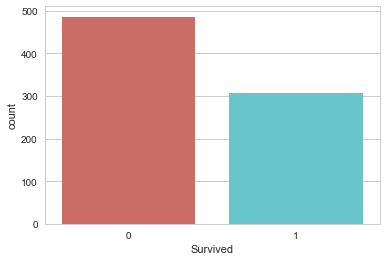

In [174]:
sns.countplot(x='Survived',data=titanic_train_data, palette='hls')

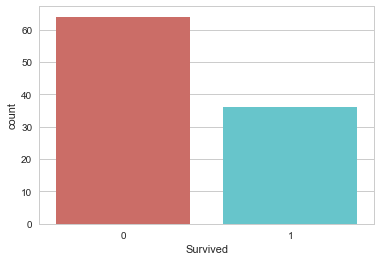

In [189]:
sns.countplot(x='Survived',data=titanic_test_data, palette='hls')

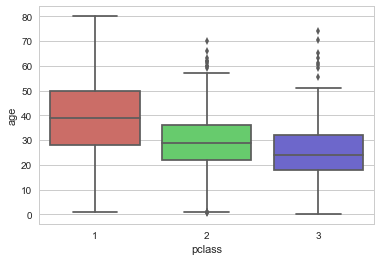

In [191]:
titanic = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/titanic3.csv', sep=',')
sns.boxplot(x='pclass', y='age', data=titanic, palette='hls')

In [192]:
titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
Unnamed: 0     792 non-null int64
PassengerId    792 non-null int64
Survived       792 non-null int64
Sex            792 non-null int64
Age            792 non-null float64
Fare           792 non-null float64
Pclass_1       792 non-null int64
Pclass_2       792 non-null int64
Pclass_3       792 non-null int64
Family_size    792 non-null float64
Title_1        792 non-null int64
Title_2        792 non-null int64
Title_3        792 non-null int64
Title_4        792 non-null int64
Emb_1          792 non-null int64
Emb_2          792 non-null int64
Emb_3          792 non-null int64
dtypes: float64(3), int64(14)
memory usage: 105.3 KB


### Prepare Training Data

In [203]:
titanic_train_data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [204]:
titanic_train_data.columns

Index(['Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Family_size', 'Title_1', 'Title_2', 'Title_3', 'Title_4', 'Emb_1',
       'Emb_2', 'Emb_3'],
      dtype='object')

In [205]:
titanic_train_data.columns.values

array(['Survived', 'Sex', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Family_size', 'Title_1', 'Title_2', 'Title_3',
       'Title_4', 'Emb_1', 'Emb_2', 'Emb_3'], dtype=object)

In [210]:
titanic_train_data.groupby('Fare').mean().head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
Fare,,,,,,,,,,,,,,
0.000000,0.083333,1.0,0.380208,0.166667,0.5,0.333333,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.007832,0.000000,1.0,0.250000,0.000000,0.0,1.000000,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0
0.012175,0.000000,1.0,0.762500,0.000000,0.0,1.000000,0.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.012679,0.000000,1.0,0.325000,0.000000,0.0,1.000000,0.05,1.0,0.0,0.0,0.0,0.0,0.0,1.0
0.013175,0.000000,0.5,0.231250,0.000000,0.0,1.000000,0.00,0.5,0.0,0.0,0.5,0.0,1.0,0.0


In [218]:
titanic_train_data.head()

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [241]:
X_train = titanic_train_data[['Sex','Age','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size','Title_1','Title_2','Title_3','Title_4','Emb_1','Emb_2','Emb_3']]
y_train = titanic_train_data[['Survived']]

In [242]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

logistic_regression.score(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8232323232323232

##### Logistic Regression Predictive Score is 0.82

### Prepare Test Data

In [233]:
titanic_test_data.drop(['Unnamed: 0','PassengerId'],axis=1,inplace=True)

In [240]:
titanic_test_data.head(10)

,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
5,1,0,0.6125,0.050610,1,0,0,0.0,0,1,0,0,0,0,1
6,1,0,0.3875,0.016949,0,0,1,0.0,1,0,0,0,0,0,1
7,0,1,0.3750,0.014110,0,0,1,0.0,1,0,0,0,1,0,0
8,0,0,0.3750,0.047138,0,0,1,0.2,1,0,0,0,0,0,1
9,0,1,0.4250,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [248]:
from sklearn import metrics
logistic_regression.fit(X_test, y_test)

X_test = titanic_test_data[['Sex','Age','Fare','Pclass_1','Pclass_2','Pclass_3','Family_size','Title_1','Title_2','Title_3','Title_4','Emb_1','Emb_2','Emb_3']]
y_test = titanic_test_data['Survived']


y_test_prediction = logistic_regression.predict(X_test)
print(y_test_prediction)

[0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0]


In [249]:
logistic_regression.score(X_test, y_test)

0.87

##### The predictive model accuracy is 0.87

### Predictive Model One Titanic Data Set

In [265]:
titanic = pd.read_csv('/Users/meganporter/OwnJupyterNotebooks/titanic_train_and_test2.csv')
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [258]:
titanic_2 = titanic.drop(['Passengerid','Embarked','zero','zero.1','zero.2','zero.3','zero.4','zero.5','zero.6','zero.7','zero.8','zero.9','zero.10','zero.11','zero.12','zero.13','zero.14','zero.15','zero.16','zero.17','zero.18'], axis=1)
titanic_2.head()

,Age,Fare,Sex,sibsp,Parch,Pclass,2urvived
0,22.0,7.2500,0,1,0,3,0
1,38.0,71.2833,1,1,0,1,1
2,26.0,7.9250,1,0,0,3,1
3,35.0,53.1000,1,1,0,1,1
4,35.0,8.0500,0,0,0,3,0


In [266]:
titanic_2.isnull()

,Age,Fare,Sex,sibsp,Parch,Pclass,2urvived
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [263]:
titanic_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
Age         1309 non-null float64
Fare        1309 non-null float64
Sex         1309 non-null int64
sibsp       1309 non-null int64
Parch       1309 non-null int64
Pclass      1309 non-null int64
2urvived    1309 non-null int64
dtypes: float64(2), int64(5)
memory usage: 71.7 KB


In [262]:
titanic_2.info

<bound method DataFrame.info of        Age      Fare  Sex  sibsp  Parch  Pclass  2urvived
0     22.0    7.2500    0      1      0       3         0
1     38.0   71.2833    1      1      0       1         1
2     26.0    7.9250    1      0      0       3         1
3     35.0   53.1000    1      1      0       1         1
4     35.0    8.0500    0      0      0       3         0
5     28.0    8.4583    0      0      0       3         0
6     54.0   51.8625    0      0      0       1         0
7      2.0   21.0750    0      3      1       3         0
8     27.0   11.1333    1      0      2       3         1
9     14.0   30.0708    1      1      0       2         1
10     4.0   16.7000    1      1      1       3         1
11    58.0   26.5500    1      0      0       1         1
12    20.0    8.0500    0      0      0       3         0
13    39.0   31.2750    0      1      5       3         0
14    14.0    7.8542    1      0      0       3         0
15    55.0   16.0000    1      0      0 

In [268]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(titanic_2, test_size=0.2)

In [275]:
X = titanic_2[['Age','Fare','Sex','sibsp','Parch','Pclass']]
y = titanic_2['2urvived']

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)
logistic_regression.score(X, y)

0.786096256684492

##### The prediction model is accurate to a proportion of 0.79

In [277]:
from sklearn.metrics import roc_auc_score
logistic_regression.fit(X, y)
y_prediction = logistic_regression.predict(X)

y_true = y
y_scores = y_prediction
roc_auc_score(y_true, y_scores)

0.6671822178680067

##### The model predicted survival rate to an accuracy of 0.67